```
Technical Assignment Week 5
Nama        : Adinda Rizki Sya'bana Diva
Kelompok    : 20
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier

In [2]:
df = pd.read_csv('ai4i2020.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [7]:
encoding = LabelEncoder()
df['Type'] = encoding.fit_transform(df['Type'])
df['Type'].value_counts()

Type
1    6000
2    2997
0    1003
Name: count, dtype: int64

In [8]:
df_used = df[['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
df_used

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,0,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,0,299.0,308.7,1408,48.5,25


In [9]:
df_target = df[['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
df_target

,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
9995,0,0,0,0,0,0
9996,0,0,0,0,0,0
9997,0,0,0,0,0,0
9998,0,0,0,0,0,0


In [10]:
print(df['Machine failure'].value_counts())
print(df['TWF'].value_counts())
print(df['HDF'].value_counts())
print(df['PWF'].value_counts())
print(df['OSF'].value_counts())
print(df['RNF'].value_counts())

Machine failure
0    9661
1     339
Name: count, dtype: int64
TWF
0    9954
1      46
Name: count, dtype: int64
HDF
0    9885
1     115
Name: count, dtype: int64
PWF
0    9905
1      95
Name: count, dtype: int64
OSF
0    9902
1      98
Name: count, dtype: int64
RNF
0    9981
1      19
Name: count, dtype: int64


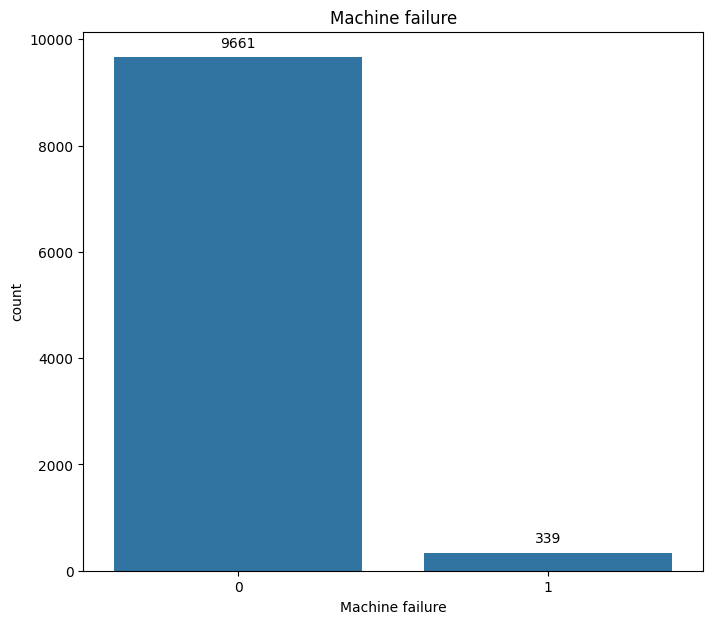

In [11]:
# Membuat countplot dan menyimpan objek ax
plt.figure(figsize=(8, 7))
ax = sns.countplot(x='Machine failure', data=df)
plt.title('Machine failure')

# Menambahkan jumlah pada setiap bar menggunakan objek ax
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_used, df_target, test_size=0.2, random_state=42)

In [13]:
linear_reg_model = MultiOutputClassifier(LogisticRegression())
linear_reg_model.fit(X_train, y_train)
y_pred = linear_reg_model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.966


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.26      0.37        61
           1       0.00      0.00      0.00        11
           2       0.75      0.35      0.48        17
           3       0.94      0.80      0.86        20
           4       0.74      0.78      0.76        18
           5       0.00      0.00      0.00         6

   micro avg       0.73      0.39      0.51       133
   macro avg       0.51      0.37      0.41       133
weighted avg       0.62      0.39      0.46       133
 samples avg       0.02      0.01      0.01       133



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [15]:
catboost_model = MultiOutputClassifier(CatBoostClassifier(verbose=0))
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.979


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.64      0.74        61
           1       0.00      0.00      0.00        11
           2       1.00      0.82      0.90        17
           3       0.88      0.75      0.81        20
           4       0.94      0.83      0.88        18
           5       0.00      0.00      0.00         6

   micro avg       0.90      0.62      0.74       133
   macro avg       0.61      0.51      0.56       133
weighted avg       0.78      0.62      0.69       133
 samples avg       0.02      0.02      0.02       133



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 